# Tarefa 08 - Cancer de Mama

* **Autor:** *Matheus Percário Bruder*
* **Data:** *11/01/2021*
* **Disciplina:** *TT007*
* **Dataset:** *[Breast Cancer - ScikitLearn](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))*

Classificação binária com o conjunto de dados do câncer de mama - Verifique o conjunto  de dados de diagnóstico de câncer de mama de Wisconsin que acompanha o scikit-learn. 

O conjunto de dados contém 569 amostras, cada uma com 30 recursos e um rótulo indicando se um o tumor era **`maligno (0)`** ou **`benigno (1)`**. 

Existem apenas dois rótulos, então este conjunto de dados é comumente usado para realizar classificação binária. Usando este conjunto de dados, reimplemente as  etapas do estudo de caso de classificação, usando o estimador Gaussian Naive Bayes (GaussianNB).

## Importações & Dataset

In [60]:
import matplotlib.pyplot as plt  

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

## Exploração Dataset

In [61]:
breast_cancer = load_breast_cancer()

In [62]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [63]:
lin = breast_cancer.data.shape[0]
col = breast_cancer.data.shape[1]

print(f'Linhas: {lin}\nColunas: {col}')

Linhas: 569
Colunas: 30


In [64]:
breast_cancer.target.shape

(569,)

### Divisão treino e teste

In [65]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)

In [66]:
X_train.shape

(426, 30)

In [67]:
X_test.shape

(143, 30)

### Criando modelo

In [68]:
clf = GaussianNB()

In [69]:
clf.fit(X=X_train, y=y_train)

GaussianNB()

In [70]:
predicted = clf.predict(X=X_test)

In [71]:
expected = y_test

In [72]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(f'Previsões erradas: {len(wrong)}\n\n{wrong}')

Previsões erradas: 7

[(1, 0), (1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0)]


## Métricas para avaliação do modelo

### score

In [73]:
print(f'Acurácia: {clf.score(X_test, y_test):.2%}')

Acurácia: 95.10%


O método _score_ nos proporciona a acurácia do nosso modelo, ou seja, o quanto (em %) o modelo foi capaz de prever corretamente. Em outras palavras, o score ou acurária nos informa o percentual de acerto do modelo, portanto, neste caso, o modelo acertou em 95.10% das previsões. 

### Confusion matrix

In [74]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

Abaixo está a matriz de confusão produzida pela chamada anterior.

* As previsões corretas são mostrados na diagonal principal.
* Os outros valores indicam previsões incorretas.
* Cada linha representa uma classe distinta, ou seja, maligno ou benigno.
* As colunas especificam quantas das amostras de teste foram classificadas em cada classe distinta.

In [75]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

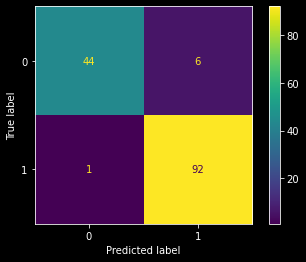

In [76]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

A matriz de confusão acima nos indica que ao total 7 itens foram classificados incorretamente, veja:

Considerando a primeira linha:
* O 6 no índice da **coluna 2** indica que seis vezes um  **`maligno` foi classificado incorretamente como `benigno`**.

Considerando a segunda linha:
* O 1 no índice da **coluna 1** indica que uma vez um **`benigno` foi classificado incorretamente como `maligno`**.

## Validação cruzada

In [87]:
from sklearn.model_selection import KFold, cross_val_predict

In [88]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [89]:
scores = cross_val_score(estimator=clf, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

A função cross_val_score retorna uma matriz de pontuações de acurácia - uma para cada subconjunto classificado.

In [90]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

Depois de ter as pontuações de acurácia, você pode ter uma noção geral da precisão do modelo calculando a pontuação média de precisão e o desvio padrão entre as 10 previsões.

In [91]:
print(f'max accuracy = {scores.max():.2%}\n')
print(f'mean accuracy = {scores.mean():.2%}')
print(f'standard deviation = {scores.std():.2%}')

max accuracy = 96.49%

mean accuracy = 93.85%
standard deviation = 2.75%
